In [34]:
# Import the necessary packages
import pandas as pd
import numpy as np
import copy
import random
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, Add, AveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split



In [35]:
# Read the data
df = pd.read_csv('data.csv')

In [36]:
df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [37]:
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [38]:
df['Image'][1].shape

(96, 96)

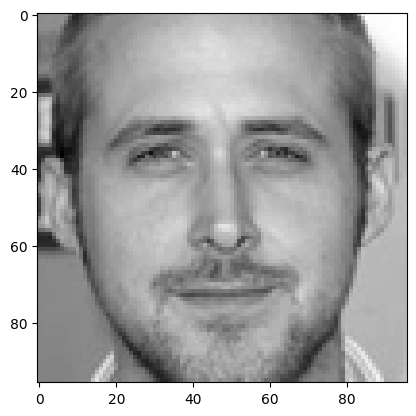

In [39]:
# Performing image virtualization
i = np.random.randint(1, len(df))
plt.imshow(df['Image'][i], cmap = 'gray')

C:\Users\spars\AppData\Local\Temp\ipykernel_24100\607940602.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[1][i-1], df.loc[1][i], 'rx')


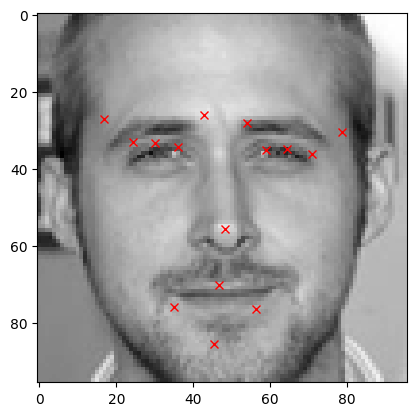

In [40]:
plt.figure()
plt.imshow(df['Image'][i], cmap = 'gray')
for i in range(1, 31, 2):
    plt.plot(df.loc[1][i-1], df.loc[1][i], 'rx')

C:\Users\spars\AppData\Local\Temp\ipykernel_24100\3090305504.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[img][j-1], df.loc[img][j], 'rx')


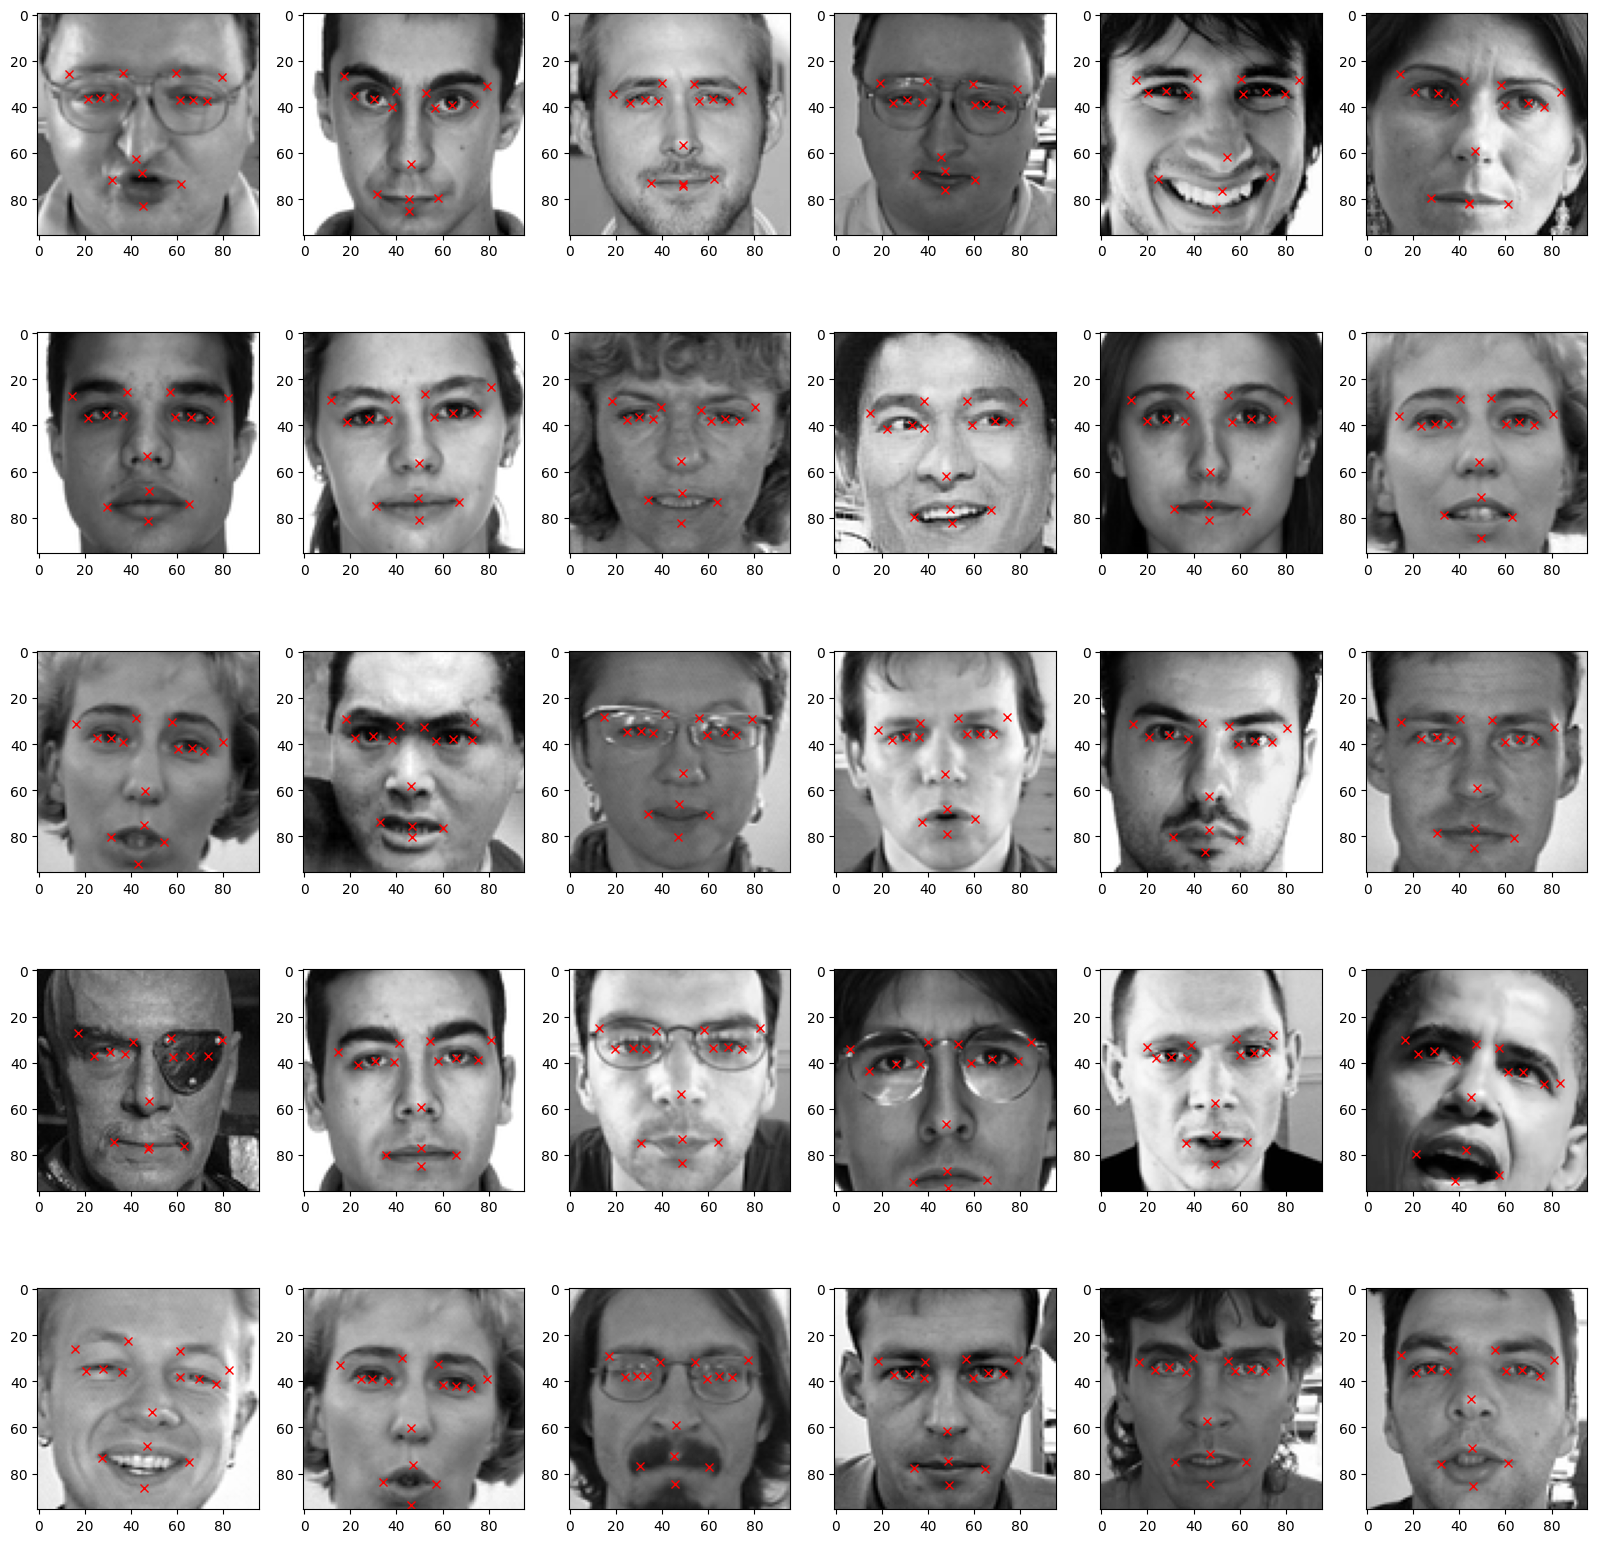

In [41]:
fig = plt.figure(figsize = (20, 20))

for i in range(30):
    img = np.random.randint(1, len(df))
    ax = fig.add_subplot(5, 6, i + 1)    
    image = plt.imshow(df['Image'][img], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[img][j-1], df.loc[img][j], 'rx')
    

    

In [42]:
# Performing Image augmentation
df_copy = copy.copy(df)


In [43]:
col = df_copy.columns[:-1]
col

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [44]:
df['Image'][1]

array([[219, 215, 204, ...,  92,  88,  84],
       [222, 219, 220, ...,  92,  88,  86],
       [231, 224, 212, ...,  77,  80,  84],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

In [45]:
df_copy['Image'] = df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [46]:
df_copy['Image'][1]

array([[ 84,  88,  92, ..., 204, 215, 219],
       [ 86,  88,  92, ..., 220, 219, 222],
       [ 84,  80,  77, ..., 212, 224, 231],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

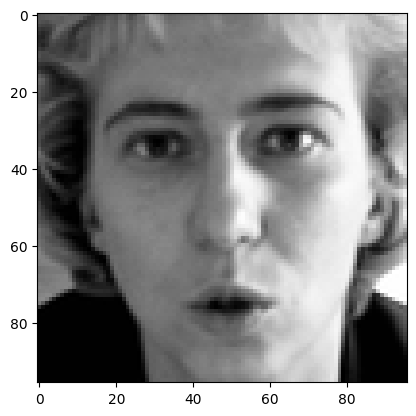

In [47]:
plt.imshow(df_copy['Image'][1], cmap = 'gray')

In [48]:
for i in range(len(col)):
  if i%2 == 0:
    df_copy[col[i]] = df_copy[col[i]].apply(lambda x: 96. - float(x) )

C:\Users\spars\AppData\Local\Temp\ipykernel_24100\413701965.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[1][j-1], df.loc[1][j], 'rx')


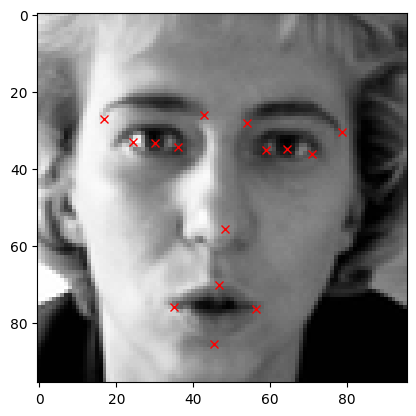

In [49]:
# View the Original image
plt.imshow(df['Image'][1],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(df.loc[1][j-1], df.loc[1][j], 'rx')

C:\Users\spars\AppData\Local\Temp\ipykernel_24100\2461653704.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df_copy.loc[1][j-1], df_copy.loc[1][j], 'rx')


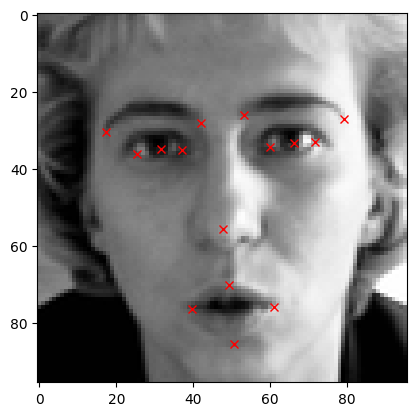

In [50]:
plt.imshow(df_copy['Image'][1], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(df_copy.loc[1][j-1], df_copy.loc[1][j], 'rx')

In [51]:
df_augmented = np.concatenate((df,df_copy))

In [52]:
df_augmented.shape

(4280, 31)

In [53]:
df_augmented

array([[66.0335639098, 39.0022736842, 30.2270075188, ..., 43.1307067669,
        84.4857744361, array([[238, 236, 237, ..., 250, 250, 250],
                              [235, 238, 236, ..., 249, 250, 251],
                              [237, 236, 237, ..., 251, 251, 250],
                              ...,
                              [186, 183, 181, ...,  52,  57,  60],
                              [189, 188, 207, ...,  61,  69,  78],
                              [191, 184, 184, ...,  70,  75,  90]])],
       [64.3329361702, 34.9700765957, 29.9492765957, ..., 45.4679148936,
        85.48017021279999, array([[219, 215, 204, ...,  92,  88,  84],
                                  [222, 219, 220, ...,  92,  88,  86],
                                  [231, 224, 212, ...,  77,  80,  84],
                                  ...,
                                  [  1,   1,   1, ...,   1,   1,   1],
                                  [  1,   1,   1, ...,   1,   1,   1],
                    

In [54]:
df_copy = copy.copy(df)
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))
df_augmented = np.concatenate((df_augmented, df_copy))
df_augmented.shape

(6420, 31)

C:\Users\spars\AppData\Local\Temp\ipykernel_24100\243924996.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df_copy.loc[1][j-1], df_copy.loc[1][j], 'rx')


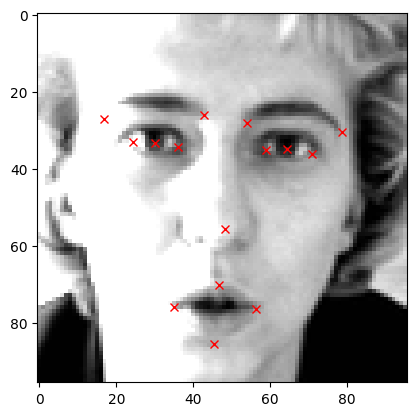

In [55]:
plt.imshow(df_copy['Image'][1], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(df_copy.loc[1][j-1], df_copy.loc[1][j], 'rx')

In [56]:
# Preparing the data for training
img = df_augmented[:, 30]
img = img/255.

sample_x = np.empty((len(img), 96, 96, 1))

for i in range(len(img)):
  sample_x[i,] = np.expand_dims(img[i], axis = 2)

sample_x = np.asarray(sample_x).astype(np.float32)
sample_x.shape

sample_y = df_augmented[:,:30]
sample_y = np.asarray(sample_y).astype(np.float32)
sample_y.shape

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(sample_x, sample_y, test_size = 0.1)

In [57]:
def residual_block(input_tensor, filters, block_stage):
    
    # Convolutional Block
    shortcut = input_tensor
    filter1, filter2, filter3 = filters

    # Main Path
    input_tensor = Conv2D(filter1, (1,1), strides=(1,1), name='block_'+str(block_stage)+'_conv1', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = MaxPool2D((2,2))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_conv1')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter2, kernel_size=(3,3), strides=(1,1), padding='same', name='block_'+str(block_stage)+'_conv2', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_conv2')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter3, kernel_size=(1,1), strides=(1,1), name='block_'+str(block_stage)+'_conv3', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_conv3')(input_tensor)

    # Shortcut Path
    shortcut = Conv2D(filter3, kernel_size=(1,1), strides=(1,1), name='block_'+str(block_stage)+'_shortcut', kernel_initializer=glorot_uniform(seed=0))(shortcut)
    shortcut = MaxPool2D((2,2))(shortcut)
    shortcut = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_shortcut')(shortcut)

    # Combine Main and Shortcut Paths
    input_tensor = Add()([input_tensor, shortcut])
    input_tensor = Activation('relu')(input_tensor)

    # Identity Block 1
    shortcut = input_tensor
    
    # Main Path
    input_tensor = Conv2D(filter1, (1,1), strides=(1,1), name='block_'+str(block_stage)+'_identity1_1', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity1_1')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter2, kernel_size=(3,3), strides=(1,1), padding='same', name='block_'+str(block_stage)+'_identity1_2', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity1_2')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter3, kernel_size=(1,1), strides=(1,1), name='block_'+str(block_stage)+'_identity1_3', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity1_3')(input_tensor)

    # Combine Main and Shortcut Paths
    input_tensor = Add()([input_tensor, shortcut])
    input_tensor = Activation('relu')(input_tensor)

    # Identity Block 2
    shortcut = input_tensor

    # Main Path
    input_tensor = Conv2D(filter1, (1,1), strides=(1,1), name='block_'+str(block_stage)+'_identity2_1', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity2_1')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter2, kernel_size=(3,3), strides=(1,1), padding='same', name='block_'+str(block_stage)+'_identity2_2', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity2_2')(input_tensor)
    input_tensor = Activation('relu')(input_tensor)

    input_tensor = Conv2D(filter3, kernel_size=(1,1), strides=(1,1), name='block_'+str(block_stage)+'_identity2_3', kernel_initializer=glorot_uniform(seed=0))(input_tensor)
    input_tensor = BatchNormalization(axis=3, name='bn_'+str(block_stage)+'_identity2_3')(input_tensor)

    # Combine Main and Shortcut Paths
    input_tensor = Add()([input_tensor, shortcut])
    input_tensor = Activation('relu')(input_tensor)

    return input_tensor


In [58]:
input_shape = (96,96,1)

# Input tensor shape
input_tensor = Input(input_shape)

# Zero-padding
x = ZeroPadding2D((3,3))(input_tensor)

# Stage #1
x = Conv2D(64, (7,7), strides=(2,2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(x)
x = BatchNormalization(axis=3, name='bn_conv1')(x)
x = Activation('relu')(x)
x = MaxPooling2D((3,3), strides=(2,2))(x)

# Stage #2
x = residual_block(x, filters=[64,64,256], block_stage=2)

# Stage #3
x = residual_block(x, filters=[128,128,512], block_stage=3)

# Average Pooling
x = AveragePooling2D((2,2), name='avg_pool')(x)

# Final layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.1)(x)
output_tensor = Dense(30, activation='relu')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 102, 102,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 48, 48,    │      3,200 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 48, 48,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 48, 48,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 23, 23,    │          0 │ activation_19[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_conv1       │ (None, 23, 23,    │      4,160 │ max_pooling2d_5[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 11, 11,    │          0 │ block_2_conv1[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv1          │ (None, 11, 11,    │        256 │ max_pooling2d_6[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 11, 11,    │          0 │ bn_2_conv1[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_conv2       │ (None, 11, 11,    │     36,928 │ activation_20[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv2          │ (None, 11, 11,    │        256 │ block_2_conv2[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 11, 11,    │          0 │ bn_2_conv2[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_shortcut    │ (None, 23, 23,    │     16,640 │ max_pooling2d_5[… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_conv3       │ (None, 11, 11,    │     16,640 │ activation_21[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 11, 11,    │          0 │ block_2_shortcut… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv3          │ (None, 11, 11,    │      1,024 │ block_2_conv3[0]

 Total params: 18,016,286 (68.73 MB)

 Trainable params: 18,007,710 (68.69 MB)

 Non-trainable params: 8,576 (33.50 KB)

In [59]:

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer=adam_optimizer, metrics=['accuracy'])

# Save the best model with the least validation loss
model_checkpoint = ModelCheckpoint(filepath="best_weights.keras", verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_split=0.05, callbacks=[model_checkpoint])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3219 - loss: 939.4243
Epoch 1: val_loss improved from inf to 2256.41748, saving model to best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3227 - loss: 920.1191 - val_accuracy: 0.6471 - val_loss: 2256.4175
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.6389 - loss: 173.5779
Epoch 2: val_loss improved from 2256.41748 to 1878.17468, saving model to best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 979ms/step - accuracy: 0.6371 - loss: 173.1584 - val_accuracy: 0.6471 - val_loss: 1878.1747
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.6520 - loss: 134.2502
Epoch 3: val_loss improved from 1878.17468 to 1536.78552, saving model to best_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 911ms/step - accuracy: 0.6511 - loss: 133.7531 - val_accuracy: 0.6471 - val_loss: 1536.7855
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.6181 - loss: 89.8761
Epoch 4: v

In [67]:
# Save trained model architecture
model_json = model.to_json()
with open('ModelArchitecture.json', 'w') as json_file:
    json_file.write(model_json)

In [68]:
# Load trained model weights
with open('ModelArchitecture.json', 'r') as json_file:
    json_saved_model = json_file.read()
loaded_model = tf.keras.models.model_from_json(json_saved_model)
loaded_model.load_weights('best_weights.keras')
loaded_model.compile(loss="mean_squared_error", optimizer=adam_optimizer, metrics=['accuracy'])

In [69]:
# Evaluate trained model
result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7076 - loss: 72.1815
Accuracy : 0.7118380069732666


In [70]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [71]:
rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 8.06783195254777


In [72]:
# Convert the predicted values into a dataframe
df_predict= pd.DataFrame(df_predict, columns = col)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,71.609726,38.563786,29.755968,38.606544,63.243519,39.605572,80.777153,39.609795,38.040867,39.594959,...,48.523849,58.386662,69.280777,79.753227,30.147158,79.385040,48.800415,76.085915,48.773724,88.170799
1,67.397751,38.941360,29.575794,40.869411,59.104851,40.663868,76.077133,39.636143,37.277210,41.667995,...,47.418987,62.625931,67.681007,80.616280,33.134651,81.958855,49.589985,80.787254,50.029034,85.917381
2,35.839714,38.110744,62.562260,38.026394,40.870064,39.063240,30.962006,38.564293,57.273678,38.838963,...,47.967815,60.058060,37.765339,76.988708,59.056835,76.769920,47.766605,74.551155,48.246670,83.230743
3,68.634079,37.832451,28.039696,39.377995,60.141697,39.673031,77.523117,38.497234,36.495346,40.302341,...,49.817455,64.901703,67.947815,81.492661,32.022747,82.731674,50.261875,82.271278,50.512646,88.080811
4,67.291794,40.086933,30.121750,38.808323,60.720512,40.742401,74.560295,41.083744,36.713772,39.879551,...,48.407608,61.397427,62.292656,83.003616,32.883518,82.013794,47.848728,76.878838,47.532280,91.489616


C:\Users\spars\AppData\Local\Temp\ipykernel_24100\2024047750.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


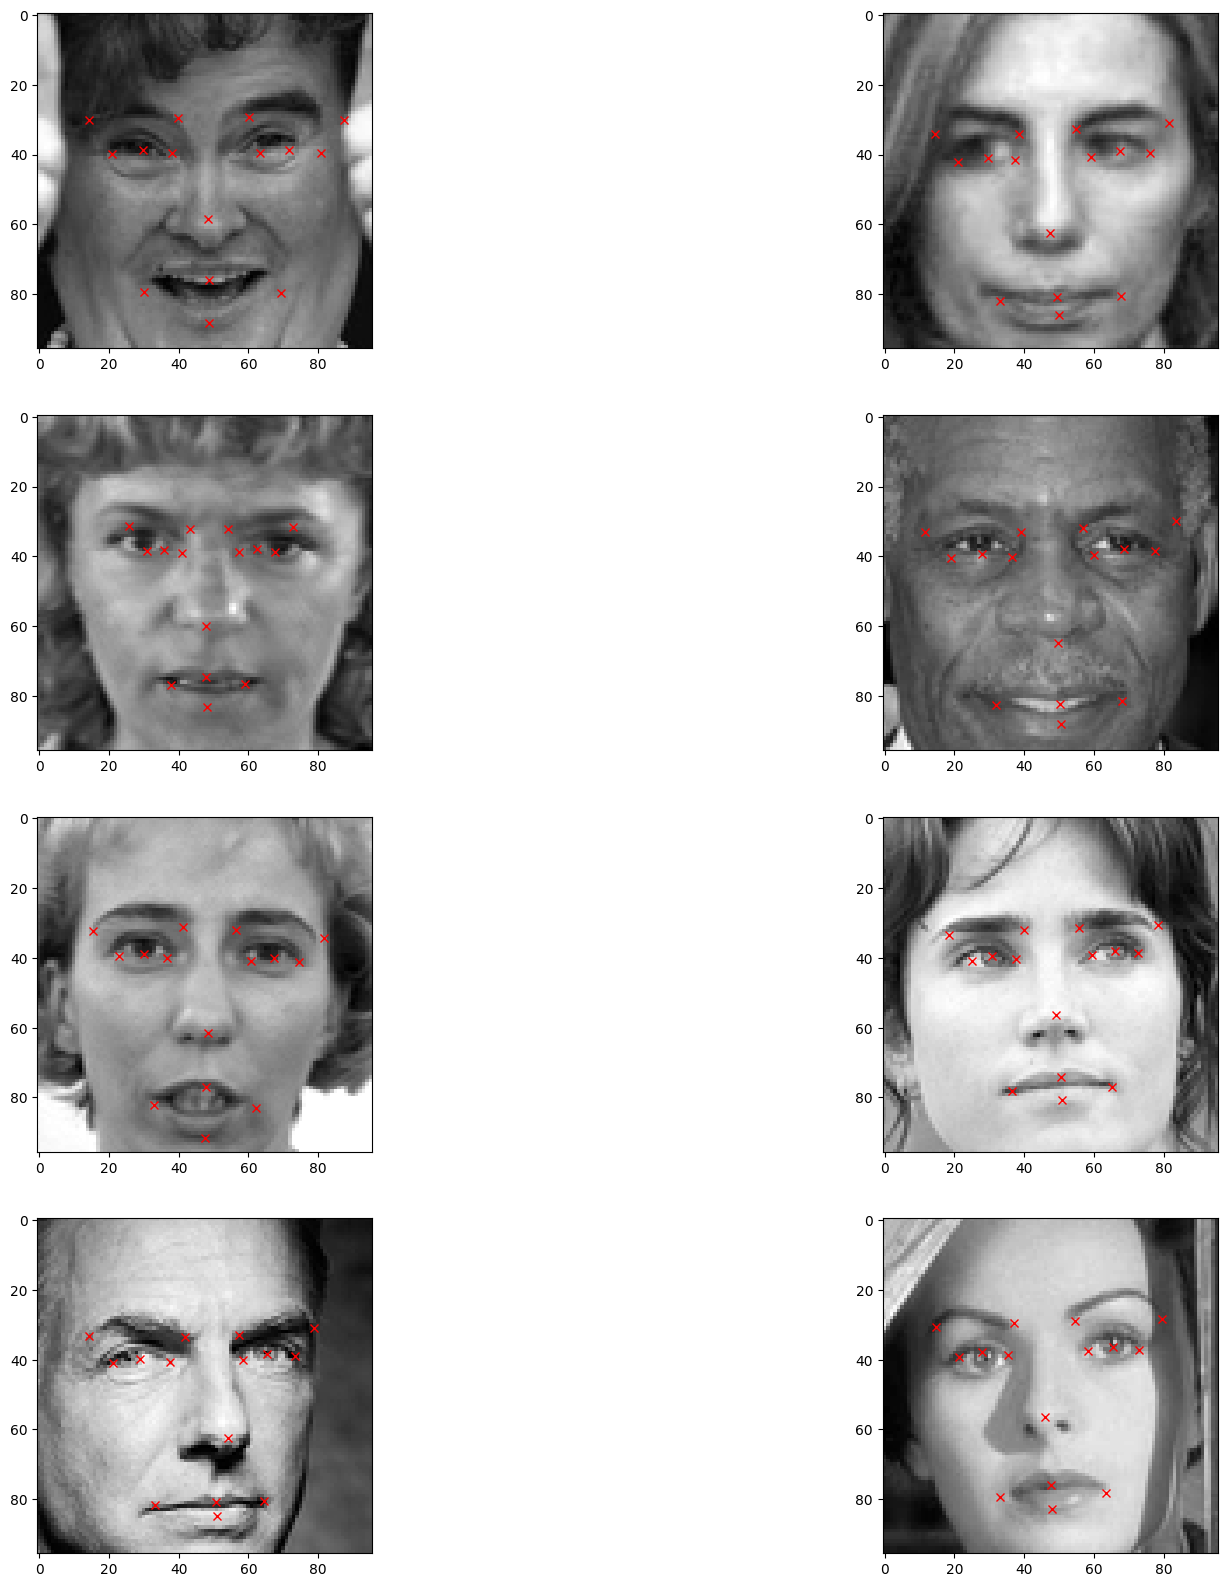

In [73]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')